In [69]:
#https://blog.tanka.la/2018/10/28/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python/
#https://www.youtube.com/watch?v=V4dd2Bt9OHY&feature=youtu.be
# https://itnext.io/classify-hand-written-digits-using-python-and-convolutional-neural-networks-26ccfc06b95c
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [70]:
#Test train split
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [71]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [72]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [73]:
#print train dataset sample
print(y_train[0])

5


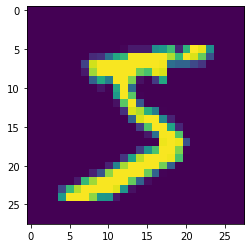

In [74]:
#image of dataset
plt.imshow(X_train[0])

In [75]:
#training data shape
X_train.shape

(60000, 28, 28)

In [76]:
# reshaping the 4th dimension to convert into greyscale
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [77]:
# to_categorical changes into matrix form eg: 5 -> 0000010000
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [78]:
print(y_train_one_hot[0],y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5


In [79]:
#Build the CNN model
model = Sequential()
#add model layers
#first layer so add input shape, 64 is the channel
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
#flatten image to one D array to conenct  to CNN
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [80]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [81]:
#Train the model
hist= model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2185 - accuracy: 0.9515 - val_loss: 0.0897 - val_accuracy: 0.9721
Epoch 2/3
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0653 - accuracy: 0.9795 - val_loss: 0.0838 - val_accuracy: 0.9736
Epoch 3/3
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0958 - val_accuracy: 0.9755


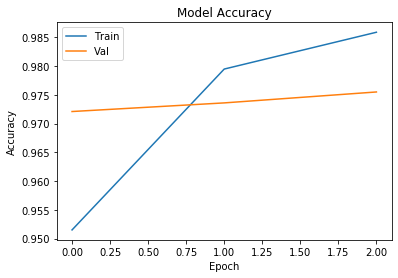

In [82]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [83]:
#show predictions as probabilities for the first 4 images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[3.4131564e-09, 2.3051144e-12, 4.8871840e-08, 3.0925193e-08,
        3.6213423e-14, 7.4475278e-13, 1.1840277e-16, 1.0000000e+00,
        1.2290485e-10, 6.7339951e-09],
       [4.9070573e-13, 8.4485969e-12, 1.0000000e+00, 4.0852877e-12,
        1.5095619e-15, 7.9415175e-17, 3.1696871e-08, 1.5459247e-13,
        1.9731220e-11, 1.2558028e-16],
       [2.9062798e-08, 9.9903786e-01, 3.7991700e-05, 5.2005085e-08,
        6.4336171e-04, 7.6728145e-05, 5.6464637e-07, 2.9113178e-06,
        2.0042693e-04, 7.5290480e-08],
       [9.9999988e-01, 1.1537986e-13, 7.0158512e-10, 1.8927965e-12,
        9.0496038e-14, 1.5192615e-11, 1.2431549e-07, 1.2507179e-13,
        2.6489053e-10, 3.1800418e-08]], dtype=float32)

In [84]:
#print our predictions as number labels for the first 4 images
#argmax returns indices of the max element of the array in a particular axis.
print(np.argmax(predictions, axis=1))
#print acctual result
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


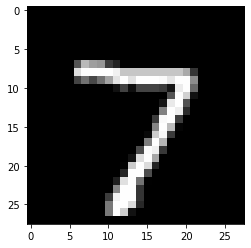

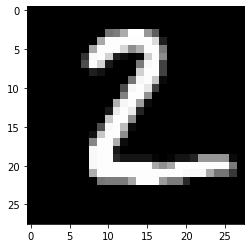

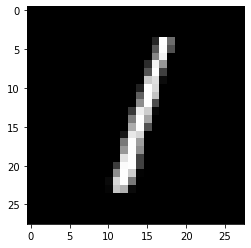

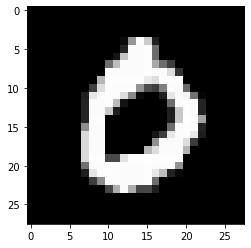

In [85]:
#show the first 4 images as pictures
for i in range(0,4):
    image = X_test[i]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    

In [86]:
from keras.models import load_model
model.save('handwritten_model.h5')

In [87]:
model2 = load_model('handwritten_model.h5')

[7 2 1 0]


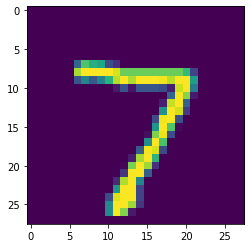

In [88]:
rslt = model2.predict(X_test[:4])
prediction=np.argmax(rslt, axis=1)
a = X_test[0].reshape((28,28))
plt.imshow(a)
print(prediction)

In [89]:
from PIL import Image, ImageFilter


def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    print(tva)
    return tva

# x=imageprepare('a.png')#file path here
# print(len(x))# mnist IMAGES are 28x28=784 pixels

In [90]:
x=imageprepare('5.png')#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [91]:
def predict(img):
    x=imageprepare(img)
    im2arr = np.array(x)
    im2arr = im2arr.reshape(28,28)
    predict_im = im2arr.reshape(1,28,28,1)
    asd = model2.predict(predict_im)
    print(np.argmax(asd,axis=1))
    plt.imshow(im2arr)
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0196078431372549, 0.11372549019607843, 0.0, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 0.003921568627

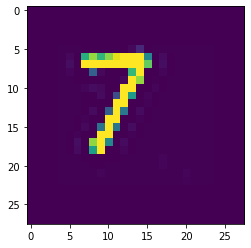

In [113]:
predict('7.png')

In [93]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

# im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

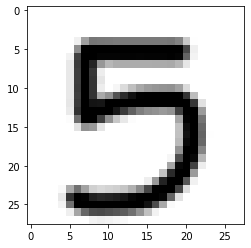

2


In [123]:
img_rows, img_cols = 28, 28
im = imageio.imread("https://i.imgur.com/a3Rql9C.png")
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()
gray = gray.reshape(1, img_rows, img_cols, 1)
# normalize image
gray /= 255
prediction = model2.predict(gray)
print(prediction.argmax())

In [101]:
def predict_image(img):
    im = imageio.imread(img)
    gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    plt.show()
    gray = gray.reshape(1, img_rows, img_cols, 1)
    # normalize image
    gray /= 255
    prediction = model2.predict(gray)
    print(prediction.argmax())

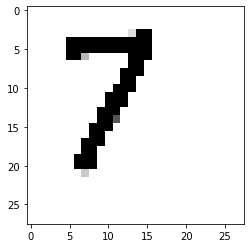

2


In [122]:
predict_image('77.png')

In [115]:
from PIL import Image
from resizeimage import resizeimage

fd_img = open('7.png', 'rb')
img = Image.open(fd_img)
img = resizeimage.resize_contain(img, [28, 28])
img.save('77.png', img.format)
fd_img.close()